# **DATA WRANGLING**

In [1]:
import pandas as pd

csv_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data.csv")

print(csv_data)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [2]:
csv_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
csv_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
csv_data['Age']

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

fungsi .iloc[i] dimana [i] menunjukan urutan baris yang akan ditampilkan yang dimana indexnya diawali dari 0. 

In [10]:
csv_data.iloc[4]

CustomerID                     5
Genre                     Female
Age                           31
Annual Income (k$)            17
Spending Score (1-100)        40
Name: 4, dtype: object

In [9]:
print(csv_data['Age'].iloc[1])

21


In [11]:
print(csv_data.iloc[5:10])

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


In [12]:
csv_data.describe(exclude=["O"])

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
csv_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data_missingvalue.csv")
print(csv_data.isnull().values.any())

True


**Missing Value**

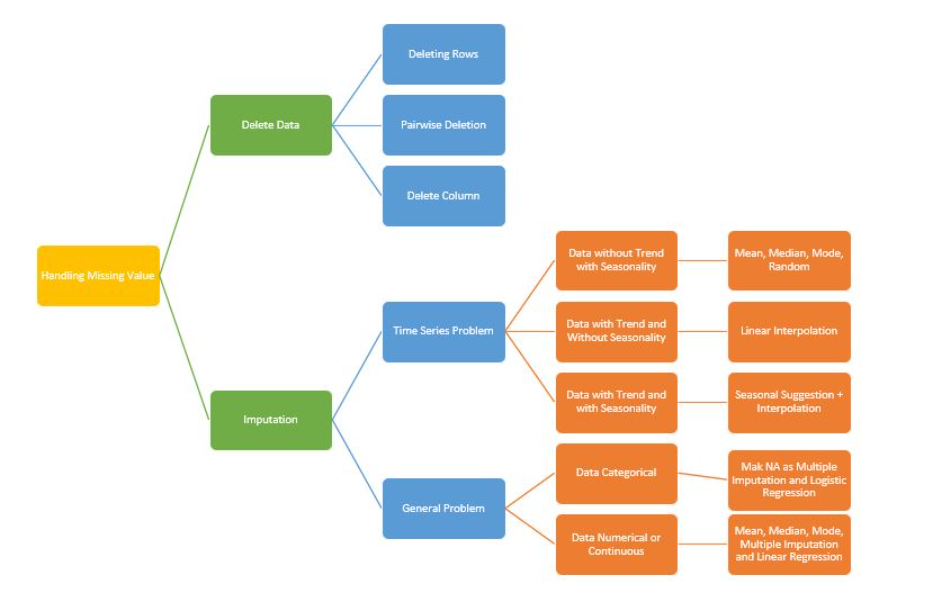

Dalam diagram diatas, perlu diketahui bahwa kasus kehilangan data bisa diatasi dengan berbagai cara. Bahkan, melakukan penghapusan data juga merupakan solusi yang bisa menjadi pilihan apabila jika dirasa mengisi nilai kosong akan memberikan pengaruh yang kurang bagus terhadap analisa, atau apabila pertimbangan data yang dihapus atau data yang hilang sedikit dan tidak memberikan terlalu banyak sumbangsih untuk analisa yang akan dilakukan. Penghapusan data bisa langsung pada baris data tersebut atau langsung satu kolom data. Pada solusi kedua yaitu menggunakan imputation (pengisian data yang kosong) bisa tergantung dari permasalahannya. Khusus untuk masalah yang berhubungan forecasting atau peramalan tergantung dari data yang ada (lebih lengkap bisa dilihat pada gambar). Khusus untuk general problem tergantung jenis datanya. Jika yang hilang data kategorikal atau bersifat string bisa menggunakna relasi antar kolom dengan Logistic Regression, jika numerical bisa menggunakan statistik sederhana dan linear regression. Pada sesi kali ini kita akan mencoba menangani data hilang dengan statistik sederhana, Mean dan Median.

In [18]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   200 non-null    object 
 2   Age                     199 non-null    float64
 3   Annual Income (k$)      198 non-null    float64
 4   Spending Score (1-100)  198 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


**Mean**

In [22]:
print(csv_data['Age'].mean())

38.93969849246231


In [24]:
print(csv_data['Annual Income (k$)'].mean())

61.005050505050505


In [25]:
print(csv_data['Spending Score (1-100)'].mean())

50.48989898989899


Untuk data kategorikal, metrik yang lebih relevan mungkin termasuk mode (kategori yang paling umum), atau menghitung distribusi frekuensi masing-masing kategori.

In [30]:
genre_mode= print(csv_data['Genre'].mode())

0    Female
Name: Genre, dtype: object


In [37]:
# Menghitung rata-rata untuk kolom-kolom numerik kecuali kolom 'Genre'
numeric_columns = csv_data.drop('Genre', axis=1).select_dtypes(include=['number'])
mean_values = numeric_columns.mean()
print(mean_values)

CustomerID                100.500000
Age                        38.939698
Annual Income (k$)         61.005051
Spending Score (1-100)     50.489899
dtype: float64


In [33]:
genre_mode = csv_data['Genre'].mode()[0]  # Get the mode value of the 'Genre' column
csv_data['Genre'].fillna(genre_mode, inplace=True)  # Fill missing values with the mode value

In [35]:
csv_data['Genre'].isnull().sum()

0

In [40]:
csv_data.fillna(mean_values, inplace=True)

In [41]:
csv_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Median**

In [48]:
csv_data2= pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data.csv")

In [49]:
csv_data2.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [46]:
# print(csv_data.head(10))
# csv_data=csv_data.fillna(csv_data.median())
# print("Dataset yang sudah diproses Handling Missing Values dengan Median :")
# print(csv_data.head(10))

**Normalisasi Data**

Terkadang pada beberapa kasus, 1 kolom dengan kolom yang lain memiliki skala yang berbeda. Seperti cuplikan gambar di bawah ini :

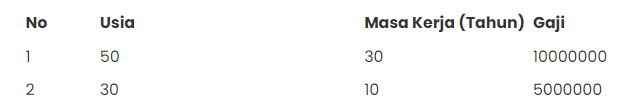

Antara Usia dan Masa Kerja masih memiliki range yang sama dalam skala puluhan. Namun, jika kolom Usia dan Masa Kerja dibandingkan dengan Gaji memiliki range nilai yang berbeda, dimana Usia dan Masa Kerja memiliki range puluhan dan Gaji mempunyai range nilai jutaan. Memang terlihat sederhana, namun hal ini bisa menjadi masalah besar dalam contoh kasus klasterisasi atau klasifikasi. Masuk pada kasus K-means yang sudah pernah dibahas sebelumnya. K-means merupakan algoritma klasterisasi (clustering) yang menggunakan perhitungan jarak dalam prosesnya. Sekarang coba bayangkan :

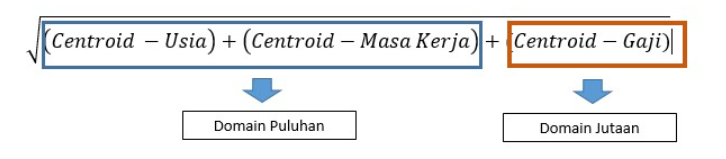

Jika tidak ada normalisasi, maka jelas perhitungan kmeans diatas akan tergantung pada Gaji. Kenapa? Karena gaji berdomain jutaan dan 2 kolom lainnya hanya berdomain puluhan. Berapapun usia dan masa kerja seseorang tidak akan berpengaruh terhadap penilaian suatu perusahaan. Perbedaan skala pada setiap kolom ini merupakan hal yang sangat wajar dan sering terjadi dan inilah pentingnya normalisasi. Normalisasi sangat penting, terutama untuk yang menggunakan perhitungan jarak dengan menggunakan metode apapun.



**Metode Normalisasi**


Ada berbagai macam metode normalisasi, seperti MinMax, Zscore, Decimal Scaling, Sigmoid, dan Softmax. Pemakaiannya tergantung pada kebutuhan dari dataset dan jenis analisa yang dilakukan.

MinMax
Metode Min-Max merupakan metode yang cukup bisa dibayangkan karena termasuk metode normalisasi yang bersifat linier dengan data aslinya. Namun, metode ini bisa menyebabkan out of bound pada beberapa kasus.

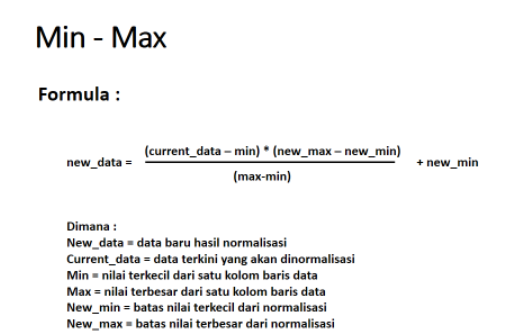

Kenapa bisa terjadi out of bound? Out of Bound terjadi apabila ada data baru masuk, dimana data tersebut melebihi nilai maksimal atau nilai minimal dari data yang sudah ada. Secara otomatis, perhitungan yang berlaku pada data yang sudah diperoleh tadi harus diulangi lagi semuanya dengan data baru yang masuk atau data baru yang mempunyai nilai maksimal/minimum yang melebihi tadi tidak bisa diproses. Karena kekurangan inilah MinMax tidak cocok untuk analisa real time / evolving system. Dimungkinkan dalam kasus-kasus terjadi kasus out of bound pada MinMax.

MinMax sangat dianjurkan untuk kasus-kasus berbasis time frame analisis dan forecasting. Perhitungan dari metode ini cukup mengurangi data yang asli dengan nilai minimal dari fitur tersebut, kemudian hasil tersebut dikalikan dari hasil pengurangan nilai maximal yang baru dengan nilai minimal yang baru dan kemudian dibagi dengan nilai max dan min data di setiap fitur terakhir ditambah dengan nilai min yang baru.

Z-Score
Zscore adalah metode yang sering digunakan dalam berbagai penelitian berbasis data mining atau data science. Z-score merupakan metode normalisasi yang berdasarkan mean (nilai rata-rata) dan standard deviation (deviasi standar) dari data. Kenapa Z-Score sangat populer? Selain tidak banyak variabel yang diset dalam perhitungannya. Z-Score sangat dinamis dalam melakukan perhitungan normalisasi. Kelemahan dari Z-Score adalah prosesnya akan terulang lagi jika ada data baru yang masuk. Selain itu elemen yang dibutuhkan untuk perhitungan Z-Score juga membutuhkan proses yang cukup lama baik standar deviation ataupun rata-rata dari setiap kolom.

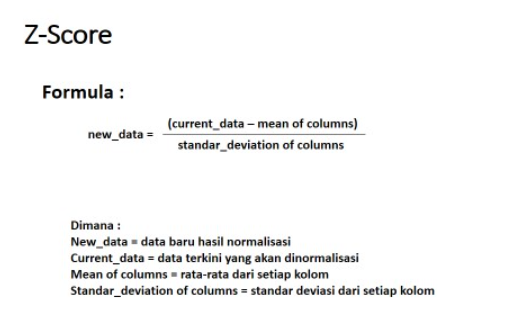

Decimal Scaling

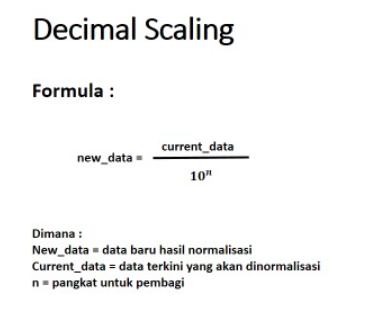

Softmax
Softmax merupakan metode normalisasi pengembangan transformasi secara linier. Output range-nya adalah 0-1. Metode ini sangat berguna pada saat data yang ada melibatkan data outlier.

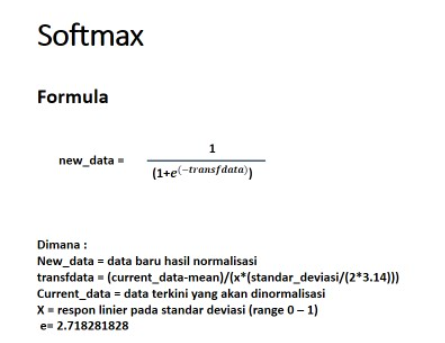

Sigmoid
Sigmoidal merupakan metode normalization melakukan normalisasi data secara nonlinier ke dalam range -1 s/d 1 dengan menggunakan fungsi sigmoid. Metode ini sangat berguna pada saat data yang ada melibatkan data outlier. Data outlier adalah data yang keluar jauh dari jangkauan data lainnya

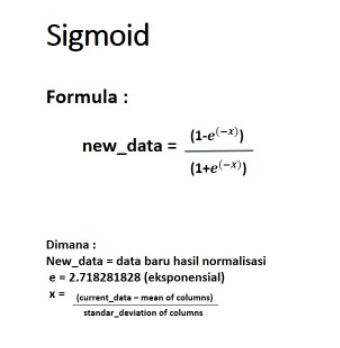

In [50]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

csv_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data.csv")
array = csv_data.values
X = array[:,2:5] #memisahkan fitur dari dataset
Y = array[:,0:1]  #memisahkan class dari dataset
dataset=pd.DataFrame({"Customer ID":array[:,0],"Gender":array[:,1],"Age":array[:,2],"Income":array[:,3],"Spending Score":array[:,4]})
print("dataset sebelum dinormalisasi :")
print(dataset.head(10))
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) #inisialisasi normalisasi MinMax
data = min_max_scaler.fit_transform(X) #transformasi MinMax untuk fitur
dataset = pd.DataFrame({"Age":data[:,0],"Income":data[:,1],"Spending Score":data[:,2],"Customer ID":array[:,0],"Gender":array[:,1]})
print("dataset setelah dinormalisasi :")
print(dataset.head(10))


dataset sebelum dinormalisasi :
  Customer ID  Gender Age Income Spending Score
0           1    Male  19     15             39
1           2    Male  21     15             81
2           3  Female  20     16              6
3           4  Female  23     16             77
4           5  Female  31     17             40
5           6  Female  22     17             76
6           7  Female  35     18              6
7           8  Female  23     18             94
8           9    Male  64     19              3
9          10  Female  30     19             72
dataset setelah dinormalisasi :
        Age    Income  Spending Score Customer ID  Gender
0  0.019231  0.000000        0.387755           1    Male
1  0.057692  0.000000        0.816327           2    Male
2  0.038462  0.008197        0.051020           3  Female
3  0.096154  0.008197        0.775510           4  Female
4  0.250000  0.016393        0.397959           5  Female
5  0.076923  0.016393        0.765306           6  Female
6 

# **DATA MANIPULATION**

Series: satu kolom bagian dari tabel dataframe yang merupakan 1 dimensional numpy array sebagai basis datanya, terdiri dari 1 tipe data (integer, string, float, dll).

DataFrame: gabungan dari Series, berbentuk rectangular data yang merupakan tabel spreadsheet itu sendiri (karena dibentuk dari banyak Series, tiap Series biasanya punya 1 tipe data, yang artinya 1 dataframe bisa memiliki banyak tipe data).
 

In [51]:
import pandas as pd
# Series
number_list = pd.Series([1,2,3,4,5,6])
print("Series:")
print(number_list)
# DataFrame
matrix = [[1,2,3],
          ['a','b','c'],
          [3,4,5],
          ['d',4,6]]
matrix_list = pd.DataFrame(matrix)
print("DataFrame:")
print(matrix_list)

Series:
0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64
DataFrame:
   0  1  2
0  1  2  3
1  a  b  c
2  3  4  5
3  d  4  6


**Atribut DataFrame & Series**

In [52]:
import pandas as pd

# Series
number_list = pd.Series([1,2,3,4,5,6])

# DataFrame
matrix_list = pd.DataFrame([[1,2,3],
                            ['a','b','c'],
                            [3,4,5],
                            ['d',4,6]])

# [1] method .info()
print("[1] method .info()")
print(matrix_list.info())

# [2] attribute .shape
print("\n[2] attribute .shape")
print("    Shape dari number_list:", number_list.shape)
print("    Shape dari matrix_list:", matrix_list.shape)

# [3] attribute .dtypes
print("\n[3] attribute .dtypes")
print("    Tipe data number_list:", number_list.dtypes)
print("    Tipe data matrix_list:", matrix_list.dtypes)

# [4] attribute .astype()
print("\n[4] method .astype()")
print("    Konversi number_list ke str:", number_list.astype("str"))
print("    Konversi matrix_list ke str:", matrix_list.astype("str"))


[1] method .info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4 non-null      object
 1   1       4 non-null      object
 2   2       4 non-null      object
dtypes: object(3)
memory usage: 228.0+ bytes
None

[2] attribute .shape
    Shape dari number_list: (6,)
    Shape dari matrix_list: (4, 3)

[3] attribute .dtypes
    Tipe data number_list: int64
    Tipe data matrix_list: 0    object
1    object
2    object
dtype: object

[4] method .astype()
    Konversi number_list ke str: 0    1
1    2
2    3
3    4
4    5
5    6
dtype: object
    Konversi matrix_list ke str:    0  1  2
0  1  2  3
1  a  b  c
2  3  4  5
3  d  4  6


In [53]:
import pandas as pd
# Series
number_list = pd.Series([1,2,3,4,5,6])
# DataFrame
matrix_list = pd.DataFrame([[1,2,3],
				            ['a','b','c'],
				            [3,4,5],
				            ['d',4,6]])
# [5] attribute .copy()
print("[5] attribute .copy()")
num_list = number_list.copy()
print("    Copy number_list ke num_list:", num_list)
mtr_list = matrix_list.copy()
print("    Copy matrix_list ke mtr_list:", mtr_list)	
# [6] attribute .to_list()
print("[6] attribute .to_list()")
print(number_list.to_list())
# [7] attribute .unique()
print("[7] attribute .unique()")
print(number_list.unique())

[5] attribute .copy()
    Copy number_list ke num_list: 0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64
    Copy matrix_list ke mtr_list:    0  1  2
0  1  2  3
1  a  b  c
2  3  4  5
3  d  4  6
[6] attribute .to_list()
[1, 2, 3, 4, 5, 6]
[7] attribute .unique()
[1 2 3 4 5 6]


In [54]:
import pandas as pd
# Series
number_list = pd.Series([1,2,3,4,5,6])
# DataFrame
matrix_list = pd.DataFrame([[1,2,3],
				            ['a','b','c'],
				            [3,4,5],
				            ['d',4,6]])
# [8] attribute .index
print("[8] attribute .index")
print("    Index number_list:", number_list.index)
print("    Index matrix_list:", matrix_list.index)	
# [9] attribute .columns
print("[9] attribute .columns")
print("    Column matrix_list:", matrix_list.columns)
# [10] attribute .loc
print("[10] attribute .loc")
print("    .loc[0:1] pada number_list:", number_list.loc[0:1])
print("    .loc[0:1] pada matrix_list:", matrix_list.loc[0:1])
# [11] attribute .iloc
print("[11] attribute .iloc")
print("    iloc[0:1] pada number_list:", number_list.loc[0:1])
print("    iloc[0:1] pada matrix_list:", matrix_list.loc[0:1])	

[8] attribute .index
    Index number_list: RangeIndex(start=0, stop=6, step=1)
    Index matrix_list: RangeIndex(start=0, stop=4, step=1)
[9] attribute .columns
    Column matrix_list: RangeIndex(start=0, stop=3, step=1)
[10] attribute .loc
    .loc[0:1] pada number_list: 0    1
1    2
dtype: int64
    .loc[0:1] pada matrix_list:    0  1  2
0  1  2  3
1  a  b  c
[11] attribute .iloc
    iloc[0:1] pada number_list: 0    1
1    2
dtype: int64
    iloc[0:1] pada matrix_list:    0  1  2
0  1  2  3
1  a  b  c


**Series & Dataframe from List, Dictionary, Numpy Array**

In [55]:
import pandas as pd
# Creating series from list
ex_list = ['a',1,3,5,'c','d']
ex_series = pd.Series(ex_list)
print(ex_series)
# Creating dataframe from list of list
ex_list_of_list = [[1,'a', 'b', 'c'],
                   [2.5,'d','e','f'],
		           [5, 'g', 'h','i'],
		           [7.5, 'j', 1.5,'l']]
index = ['dq','lab','kar','an']
cols = ['float','char', 'obj','char']
ex_df = pd.DataFrame(ex_list_of_list, index=index, columns=cols)
print(ex_df)

0    a
1    1
2    3
3    5
4    c
5    d
dtype: object
     float char  obj char
dq     1.0    a    b    c
lab    2.5    d    e    f
kar    5.0    g    h    i
an     7.5    j  1.5    l


In [56]:
import pandas as pd
# Creating series from dictionary
dict_series = {'1' : 'a',
			   '2' : 'b',
			   '3' : 'c'}
ex_series = pd.Series(dict_series)
print(ex_series)
# Creating dataframe from dictionary
df_series = {'1': ['a','b','c'],
             '2': ['b','c','d'],
             '4': [2, 3, 'z']}
ex_df = pd.DataFrame(df_series)
print(ex_df)

1    a
2    b
3    c
dtype: object
   1  2  4
0  a  b  2
1  b  c  3
2  c  d  z


In [57]:
import pandas as pd
import numpy as np
# Creating series from numpy array (1D)
arr_series = np.array([1,2,3,4,5,6,6,7])
ex_series = pd.Series(arr_series)
print(ex_series)
# Creating dataframe from numpy array (2D)
arr_df = np.array([[1  ,2  ,3  ,5],
                   [5  ,6  ,7  ,8],
                   ['a','b','c',10]])
ex_df = pd.DataFrame(arr_df)
print(ex_df)

0    1
1    2
2    3
3    4
4    5
5    6
6    6
7    7
dtype: int32
   0  1  2   3
0  1  2  3   5
1  5  6  7   8
2  a  b  c  10


**Dataset I/O**


membaca dan menyimpan dataset dari dan ke beberapa tipe file

In [58]:
import pandas as pd
# File CSV
df_csv = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
print(df_csv.head(3)) # Menampilkan 3 data teratas
# File TSV
df_tsv = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_tsv.tsv", sep='\t')
print(df_tsv.head(3)) # Menampilkan 3 data teratas

   order_id  order_date  customer_id             city     province product_id  \
0   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0648   
1   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3826   
2   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1508   

     brand  quantity  item_price  
0  BRAND_C         4     1934000  
1  BRAND_V         8      604000  
2  BRAND_G        12      747000  
   order_id  order_date  customer_id             city     province product_id  \
0   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0648   
1   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3826   
2   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1508   

     brand  quantity  item_price  
0  BRAND_C         4     1934000  
1  BRAND_V         8      604000  
2  BRAND_G        12      747000  


In [59]:
import pandas as pd
# File xlsx dengan data di sheet "test"
df_excel = pd.read_excel("https://storage.googleapis.com/dqlab-dataset/sample_excel.xlsx", sheet_name="test")
print(df_excel.head(4)) # Menampilkan 4 data teratas

   order_id  order_date  customer_id             city     province product_id  \
0   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0648   
1   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3826   
2   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1508   
3   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0520   

     brand  quantity  item_price  
0  BRAND_C         4     1934000  
1  BRAND_V         8      604000  
2  BRAND_G        12      747000  
3  BRAND_B        12      450000  


In [60]:
import pandas as pd
# File JSON
url = "https://storage.googleapis.com/dqlab-dataset/covid2019-api-herokuapp-v2.json"
df_json = pd.read_json(url)
print(df_json.head) # Menampilkan 10 data teratas

<bound method NDFrame.head of                                                   data          dt          ts
0    {'location': 'US', 'confirmed': 3363056, 'deat...  07-14-2020  1594684800
1    {'location': 'Brazil', 'confirmed': 1884967, '...  07-14-2020  1594684800
2    {'location': 'India', 'confirmed': 906752, 'de...  07-14-2020  1594684800
3    {'location': 'Russia', 'confirmed': 732547, 'd...  07-14-2020  1594684800
4    {'location': 'Peru', 'confirmed': 330123, 'dea...  07-14-2020  1594684800
..                                                 ...         ...         ...
183  {'location': 'Saint Kitts and Nevis', 'confirm...  07-14-2020  1594684800
184  {'location': 'Holy See', 'confirmed': 12, 'dea...  07-14-2020  1594684800
185  {'location': 'Papua New Guinea', 'confirmed': ...  07-14-2020  1594684800
186  {'location': 'Western Sahara', 'confirmed': 10...  07-14-2020  1594684800
187  {'location': 'MS Zaandam', 'confirmed': 9, 'de...  07-14-2020  1594684800

[188 rows x 3 columns

**SQL**

Fungsi `.read_sql()` atau `.read_sql_query()` digunakan untuk membaca query dari database dan translate menjadi pandas dataframe, contoh case ini database sqlite.

In [ ]:
import mysql.connector
import pandas as pd

# Membuat koneksi ke database financial di https://relational.fit.cvut.cz/dataset/Financial

conn = myql.connector.connect(host='relational.fit.cvut.cz', 
                              port= 3306, 
                              user='guest', 
                              passwd= "relational",
                              database= "financial",
                              use_pure= True)

# Buatlah query sql untuk membaca tabel loan
my_query= """ 
SELECT * 
FROM loan; 
"""

`.read_sql_query()`

In [ ]:
df_loan= pd.read_sql_query(my_query, conn)
df_loan.head()

`.read_sql`

In [ ]:
df_loan= pd.read_sql(my_query, conn)
df_loan.head()

**Google BigQuery**

In [ ]:
import pandas as pd

query = """
SELECT * 
FROM `bigquery-public-data-
LIMIT 1000
"""

# Baca data dari Google Big Query
df_covid19_eu_summary = pd.read_gbq(query, project_id=XXXX)
# Tampilkan 5 data teratas
df_covid19_eu_summary

**Write Dataset**

Method- Code

1. csv tsv
`.to_csv()` → digunakan untuk export dataframe kembali ke csv atau tsv	
CSV
`df.to_csv("csv1.csv", index=False)`
TSV
`df.to_csv("tsv1.tsv", index=False, sep='\t')`

2. Clipboard
`.to_clipboard()` → export dataframe menjadi bahan copy jadi nanti bisa tinggal klik paste di excel atau google sheets
`df.to_clipboard()`

3. Excel
`.to_excel()`→ export dataframe menjadi file excel
`df_excel.to_excel("xlsx1.xlsx", index=False)`

4. Google BigQuery
`.to_gbq()` → export dataframe menjadi table di Google BigQuery

`df.to_gbq("temp.test", project_id="XXXXXX", if_exists="fail")`
temp: nama dataset, test: nama table

if_exists: ketika tabel dengan dataset.table_name yang sama sudah ada, apa action yang ingin dilakukan

("fail": tidak melakukan apa-apa, "replace': membuang tabel yang sudah ada dan mengganti yang baru,  "append": menambah baris di tabel tersebut dengan data yang baru
)

In [61]:
import pandas as pd
# Baca file sample_csv.csv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Tampilkan 3 data teratas
print("Tiga data teratas:\n", df.head(3))
# Tampilkan 3 data terbawah
print("Tiga data terbawah:\n", df.tail(3))

Tiga data teratas:
    order_id  order_date  customer_id             city     province product_id  \
0   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0648   
1   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3826   
2   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1508   

     brand  quantity  item_price  
0  BRAND_C         4     1934000  
1  BRAND_V         8      604000  
2  BRAND_G        12      747000  
Tiga data terbawah:
      order_id  order_date  customer_id      city          province product_id  \
98    1612390  2019-01-01        12681  Makassar  Sulawesi Selatan      P3354   
99    1612390  2019-01-01        12681  Makassar  Sulawesi Selatan      P3357   
100   1612390  2019-01-01        12681  Makassar  Sulawesi Selatan      P0422   

       brand  quantity  item_price  
98   BRAND_S        24      450000  
99   BRAND_S        24      450000  
100  BRAND_B         4     1325000  


**Indexing**


Index merupakan key identifier dari tiap row/column untuk Series atau Dataframe (sifatnya tidak mutable untuk masing-masing value tapi bisa diganti untuk semua value sekaligus).

Jika tidak disediakan, pandas akan membuat kolom index default secara otomatis sebagai bilangan bulat (integer) dari 0 sampai range jumlah baris data tersebut.

Kolom index dapat terdiri dari:

1. satu kolom (single index), atau
2. multiple kolom (disebut dengan hierarchical indexing).
Index dengan multiple kolom ini terjadi karena unique identifier tidak dapat dicapai hanya dengan set index di 1 kolom saja sehingga membutuhkan beberapa kolom yang menjadikan tiap row menjadi unique.

In [62]:
import pandas as pd
# Baca file TSV sample_tsv.tsv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_tsv.tsv", sep="\t")
# Index dari df
print("Index:", df.index)
# Column dari df
print("Columns:", df.columns)

Index: RangeIndex(start=0, stop=101, step=1)
Columns: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price'],
      dtype='object')


In [63]:
import pandas as pd

# Baca file TSV sample_tsv.tsv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_tsv.tsv", sep="\t")
# Set multi index df
df_x = df.set_index(['order_date', 'city', 'customer_id'])
# Print nama dan level dari multi index
for name, level in zip(df_x.index.names, df_x.index.levels):
    print(name, ':', level)

order_date : Index(['2019-01-01'], dtype='object', name='order_date')
city : Index(['Bogor', 'Jakarta Pusat', 'Jakarta Selatan', 'Jakarta Utara',
       'Makassar', 'Malang', 'Surabaya', 'Tangerang'],
      dtype='object', name='city')
customer_id : Index([12681, 13963, 15649, 17091, 17228, 17450, 17470, 17511, 17616, 18055], dtype='int64', name='customer_id')


In [64]:
import pandas as pd
# Baca file sample_tsv.tsv untuk 10 baris pertama saja
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_tsv.tsv", sep="\t", nrows=10)
# Cetak data frame awal
print("Dataframe awal:\n", df)
# Set index baru
df.index = ["Pesanan ke-" + str(i) for i in range(1, 11)]
# Cetak data frame dengan index baru
print("Dataframe dengan index baru:\n", df)

Dataframe awal:
    order_id  order_date  customer_id             city     province product_id  \
0   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0648   
1   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3826   
2   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1508   
3   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0520   
4   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1513   
5   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3911   
6   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1780   
7   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3132   
8   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1342   
9   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P2556   

     brand  quantity  item_price  
0  BRAND_C         4     1934000  
1  BRAND_V         8 

In [65]:
import pandas as pd
# Baca file sample_tsv.tsv dan set lah index_col sesuai instruksi
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_tsv.tsv", sep="\t", index_col=["order_date", "order_id"])
# Cetak data frame untuk 8 data teratas
print("Dataframe:\n", df.head(8))

Dataframe:
                      customer_id             city     province product_id  \
order_date order_id                                                         
2019-01-01 1612339         18055  Jakarta Selatan  DKI Jakarta      P0648   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P3826   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P1508   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P0520   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P1513   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P3911   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P1780   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P3132   

                       brand  quantity  item_price  
order_date order_id                                 
2019-01-01 1612339   BRAND_C         4     1934000  
           1612339   BRAND_V         8      604000  
     

**Slicing**

Seperti artinya slicing adalah cara untuk melakukan filter ke dataframe/series berdasarkan kriteria tertentu dari nilai kolomnya ataupun kriteria index-nya.

Terdapat 2 cara paling terkenal untuk slicing dataframe, yaitu dengan menggunakan method .loc dan .iloc pada variabel bertipe pandas DataFrame/Series. Method .iloc ditujukan untuk proses slicing berdasarkan index berupa nilai integer tertentu. Akan tetapi akan lebih sering menggunakan dengan method .loc karena lebih fleksibel. 

In [66]:
import pandas as pd
# Baca file sample_csv.csv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Slice langsung berdasarkan kolom
df_slice = df.loc[(df["customer_id"] == "2019-01-01") &
		          (df["product_id"].isin(["18055","P0029","P0040","P0041","P0116","P0117"]))
				 ]
print("Slice langsung berdasarkan kolom:\n", df_slice)

Slice langsung berdasarkan kolom:
 Empty DataFrame
Columns: [order_id, order_date, customer_id, city, province, product_id, brand, quantity, item_price]
Index: []


In [67]:
import pandas as pd
# Baca file sample_csv.csv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Set index dari df sesuai instruksi
df = df.set_index(["order_date","order_id","product_id"])
# Slice sesuai intruksi
df_slice = df.loc[("2019-01-01",1612339,["P2154","P2159"]),:]
print("Slice df:\n", df_slice)

Slice df:
                                 customer_id             city     province  \
order_date order_id product_id                                              
2019-01-01 1612339  P2154             18055  Jakarta Selatan  DKI Jakarta   
                    P2159             18055  Jakarta Selatan  DKI Jakarta   

                                  brand  quantity  item_price  
order_date order_id product_id                                 
2019-01-01 1612339  P2154       BRAND_M         4     1745000  
                    P2159       BRAND_M        24      310000  


Transforming 
Transform adalah ketika mengubah dataset yang ada menjadi entitas baru, dapat dilakukan dengan:

konversi dari satu data type ke data type yang lain,
transpose dataframe,
atau yang lainnya.
Hal yang biasa dilakukan pertama kali setelah data dibaca adalah mengecek tipe data di setiap kolomnya apakah sesuai dengan representasinya. Untuk itu dapat menggunakan atribut .dtypes pada dataframe yang telah kita baca tadi,

`[nama_dataframe].dtypes`
 

Untuk konversi tipe data, secara default system akan mendeteksi data yang tidak bisa di render as date type or numeric type sebagai object yang basically string. Tidak bisa di render oleh system ini karena berbagai hal, mungkin karena formatnya asing dan tidak dikenali oleh python secara umum (misal: date type data → '2019Jan01').

Data contoh tersebut tidak bisa di render karena bulannya Jan tidak bisa di translate menjadi in form of number (00-12) dan tidak ada ‘-’ di antara tahun, bulan dan harinya. Jika seluruh data pada kolom di order_date sudah tertulis dalam bentuk 'YYYY-MM-DD' maka ketika dibaca, kolom order_date sudah langsung dinyatakan bertipe data datetime.

Untuk merubah kolom date_order yang sebelumnya bertipe object menjadi kolom bertipe datetime, cara pertama yang dapat dilakukan adalah menggunakan:

`pd.to_datetime(argumen)` 
dengan argumen adalah isi kolom dari dataframe yang akan dirubah tipe datanya, misal dalam format umum.

`nama_dataframe["nama_kolom"]`
Sehingga lengkapnya dapat ditulis sebagai:

`nama_dataframe["nama_kolom"] = pd.to_datetime(nama_dataframe["nama_kolom"])`
 

In [68]:
import pandas as pd
# Baca file sample_csv.csv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Tampilkan tipe data
print("Tipe data df:\n", df.dtypes)
# Ubah tipe data kolom order_date menjadi datetime
df["order_date"] = pd.to_datetime(df["order_date"])
# Tampilkan tipe data df setelah transformasi
print("\nTipe data df setelah transformasi:\n", df.dtypes)

Tipe data df:
 order_id        int64
order_date     object
customer_id     int64
city           object
province       object
product_id     object
brand          object
quantity        int64
item_price      int64
dtype: object

Tipe data df setelah transformasi:
 order_id                int64
order_date     datetime64[ns]
customer_id             int64
city                   object
province               object
product_id             object
brand                  object
quantity                int64
item_price              int64
dtype: object


In [69]:
import pandas as pd
# Baca file sample_csv.csv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Tampilkan tipe data
print("Tipe data df:\n", df.dtypes)
# Ubah tipe data kolom quantity menjadi tipe data numerik float
df["quantity"] = pd.to_numeric(df["quantity"], downcast="float")
# Ubah tipe data kolom city menjadi tipe data category
df["city"] = df["city"].astype("category")
# Tampilkan tipe data df setelah transformasi
print("\nTipe data df setelah transformasi:\n", df.dtypes)

Tipe data df:
 order_id        int64
order_date     object
customer_id     int64
city           object
province       object
product_id     object
brand          object
quantity        int64
item_price      int64
dtype: object

Tipe data df setelah transformasi:
 order_id          int64
order_date       object
customer_id       int64
city           category
province         object
product_id       object
brand            object
quantity        float32
item_price        int64
dtype: object


In [70]:
import pandas as pd
# Baca file sample_csv.csv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Cetak 5 baris teratas kolom brand
print("Kolom brand awal:\n", df["brand"].head())
# Gunakan method apply untuk merubah isi kolom menjadi lower case
df["brand"] = df["brand"].apply(lambda x: x.lower())
# Cetak 5 baris teratas kolom brand
print("Kolom brand setelah apply:\n", df["brand"].head)
# Gunakan method map untuk mengambil kode brand yaitu karakter terakhirnya
df["brand"] = df["brand"].map(lambda x: x[-1])
# Cetak 5 baris teratas kolom brand
print("Kolom brand setelah map:\n", df["brand"].head())

Kolom brand awal:
 0    BRAND_C
1    BRAND_V
2    BRAND_G
3    BRAND_B
4    BRAND_G
Name: brand, dtype: object
Kolom brand setelah apply:
 <bound method NDFrame.head of 0      brand_c
1      brand_v
2      brand_g
3      brand_b
4      brand_g
        ...   
96     brand_s
97     brand_r
98     brand_s
99     brand_s
100    brand_b
Name: brand, Length: 101, dtype: object>
Kolom brand setelah map:
 0    c
1    v
2    g
3    b
4    g
Name: brand, dtype: object


In [71]:
import numpy as np
import pandas as pd
# number generator, set angka seed menjadi suatu angka, bisa semua angka, supaya hasil random nya selalu sama ketika kita run
np.random.seed(1234)
# create dataframe 3 baris dan 4 kolom dengan angka random
df_tr = pd.DataFrame(np.random.rand(3,4)) 
# Cetak dataframe
print("Dataframe:\n", df_tr)
# Cara 1 dengan tanpa define function awalnya, langsung pake fungsi anonymous lambda x
df_tr1 = df_tr.applymap(lambda x: x**2 + 3*x + 2) 
print("\nDataframe - cara 1:\n", df_tr1)
# Cara 2 dengan define function 
def times_100(x):
	return x**2 + 3*x + 2
df_tr2 = df_tr.applymap(times_100)
print("\nDataframe - cara 2:\n", df_tr2)


Dataframe:
           0         1         2         3
0  0.191519  0.622109  0.437728  0.785359
1  0.779976  0.272593  0.276464  0.801872
2  0.958139  0.875933  0.357817  0.500995

Dataframe - cara 1:
           0         1         2         3
0  2.611238  4.253346  3.504789  4.972864
1  4.948290  2.892085  2.905825  5.048616
2  5.792449  5.395056  3.201485  3.753981

Dataframe - cara 2:
           0         1         2         3
0  2.611238  4.253346  3.504789  4.972864
1  4.948290  2.892085  2.905825  5.048616
2  5.792449  5.395056  3.201485  3.753981


C:\Users\immab\AppData\Local\Temp\ipykernel_19072\2040056363.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_tr1 = df_tr.applymap(lambda x: x**2 + 3*x + 2)
C:\Users\immab\AppData\Local\Temp\ipykernel_19072\2040056363.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_tr2 = df_tr.applymap(times_100)


**Inspeksi Missing Value**

Value yang hilang/tidak lengkap dari dataframe akan membuat analisis atau model prediksi yang dibuat menjadi tidak akurat dan mengakibatkan keputusan salah yang diambil. Terdapat beberapa cara untuk mengatasi data yang hilang/tidak lengkap tersebut.

Data COVID-19 yang akan digunakan ini diambil dari google big query, tetapi sudah disediakan datasetnya dalam format csv dengan nama https://storage.googleapis.com/dqlab-dataset/datacovid19.csv. Ini adalah studi kasus untuk meng-handle missing value. Bagaimanakah langkah-langkahnya?

Di pandas data yang hilang umumnya direpresentasikan dengan NaN.

 

Langkah pertama, harus tahu kolom mana yang terdapat data hilang dan berapa banyak dengan cara:

Cara 1: menerapkan method .info() pada dataframe yang dapat diikuti dari kode berikut ini:

Notes :

Dataset : https://storage.googleapis.com/dqlab-dataset/datacovid19.csv



Output baris kode kelima:

 

Cara 2: mengetahui berapa banyak nilai hilang dari tiap kolom di dataset tersebut dengan menerapkan chaining method pada dataframe yaitu .isna().sum(). Method .isna() digunakan untuk mengecek berapa data yang bernilai NaN dan .sum() menjumlahkannya secara default untuk masing-masing kolom dataframe.

In [72]:
import pandas as pd
# Baca file "https://storage.googleapis.com/dqlab-dataset/datacovid19.csv"
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/datacovid19.csv")
# Cetak info dari df
print(df.info())
# Cetak jumlah missing value di setiap kolom
mv = df.isna().sum()
print("\nJumlah missing value per kolom:\n", mv)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  960 non-null    object 
 1   country_region  1000 non-null   object 
 2   date            1000 non-null   object 
 3   latitude        874 non-null    float64
 4   longitude       874 non-null    float64
 5   location_geom   874 non-null    object 
 6   confirmed       1000 non-null   int64  
 7   deaths          999 non-null    float64
 8   recovered       999 non-null    float64
 9   active          949 non-null    float64
 10  fips            949 non-null    float64
 11  admin2          842 non-null    object 
 12  combined_key    0 non-null      float64
dtypes: float64(7), int64(1), object(5)
memory usage: 101.7+ KB
None

Jumlah missing value per kolom:
 province_state      40
country_region       0
date                 0
latitude           126
longitude          126
l

dataset ‘retail_raw_test.csv’

1. Baca dataset
2. Tipe data diubah menjadi tipe yang seharusnya
    - customer_id dari string ke int64,
    - quantity dari string ke int64,
    - item_price dari string ke int64
3. transform product_value supaya bentuknya seragam dengan format PXXXX, assign ke kolom baru "product_id", dan drop kolom "product_value", jika terdapat nan gantilah dengan "unknown".
4. trasnform order_date menjadi value dengan format YYYY-mm-dd
5. cek data hilang dari tiap kolom dan kemudian isi missing value
    - di brand dengan "no_brand", dan
    - cek dulu bagaimana missing value di city & province - isi missing value di city dan province dengan "unknown"
6. create column city/province dari gabungan city & province
7. membuat index berdasarkan city_provice, order_date, customer_id, order_id, product_id (cek index)
8. membuat kolom "total_price" sebagai hasil perkalian quantity dengan item_price
9. slice data hanya untuk Jan 2019

In [74]:
import pandas as pd

# 1. Baca dataset
print("[1] BACA DATASET")
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/retail_raw_test.csv", low_memory=False)
print("    Dataset:\n", df.head())
print("    Info:\n", df.info())

# 2. Ubah tipe data
print("\n[2] UBAH TIPE DATA")
df["customer_id"] = df["customer_id"].apply(lambda x: int(x.split("'")[1]) if isinstance(x, str) and "'" in x else x)
df["quantity"] = df["quantity"].apply(lambda x: int(x)).astype("int64")
df["item_price"] = df["item_price"].apply("int64")
print("    Tipe data:\n", df.dtypes)

# 3. Transform "product_value" supaya bentuknya seragam dengan format "PXXXX", assign ke kolom baru "product_id", dan drop kolom "product_value", jika terdapat nan gantilah dengan "unknown"
print("\n[3] TRANSFORM product_value MENJADI product_id")
# Buat fungsi
import math
def impute_product_value(val):
    if math.isnan(val):
        return "unknown"
    else:
        return 'P' + '{:0>4}'.format(str(val).split('.')[0])
# Buat kolom "product_id"
df["product_id"] = df["product_value"].apply(lambda x: impute_product_value(x))
# Hapus kolom "product_value"
df.drop(["product_value"], axis=1, inplace=True)
# Cetak 5 data teratas
print(df.head())

# 4. Tranform order_date menjadi value dengan format "YYYY-mm-dd"
print("\n[4] TRANSFORM order_date MENJADI FORMAT YYYY-mm-dd")
months_dict = {
   "Jan":"01",
   "Feb":"02",
   "Mar":"03",
   "Apr":"04",
   "May":"05",
   "Jun":"06",
   "Jul":"07",
   "Aug":"08",
   "Sep":"09",
   "Oct":"10",
   "Nov":"11",
   "Dec":"12"
}
df["order_date"] = pd.to_datetime(df["order_date"].apply(lambda x: str(x)[-4:] + "-" + months_dict[str(x)[:3]] + "-" + str(x)[4:7]))
print("    Tipe data:\n", df.dtypes)

# 5. Mengatasi data yang hilang di beberapa kolom
print("\n[5] HANDLING MISSING VALUE")
# Kolom "city" dan "province" masih memiliki missing value, nilai yang hilang di kedua kolom ini diisi saja dengan "unknown"
df[["city","province"]] = df[["city","province"]].fillna("unknown")
# Kolom brand juga masih memiliki missing value, Ganti value NaN menjadi "no_brand"
df["brand"] = df["brand"].fillna("no_brand")
# Cek apakah masih terdapat missing value di seluruh kolom 
print("    Info:\n", df.info())

# 6. Membuat kolom baru "city/province" dengan menggabungkan kolom "city" dan kolom "province" dan delete kolom asalnya
print("\n[6] MEMBUAT KOLOM BARU city/province")
df["city/province"] = df["city"] + "/" + df["province"]
# drop kolom "city" dan "province" karena telah digabungkan
df.drop(["city","province"], axis=1, inplace=True)
# Cetak 5 data teratas
print(df.head())

# 7. Membuat hierarchical index yang terdiri dari kolom "city/province", "order_date", "customer_id", "order_id", "product_id"
print("\n[7] MEMBUAT HIERACHICAL INDEX")
df= df.set_index(["city/province", "order_date", "customer_id", "order_id", "product_id"], inplace=True)
# urutkanlah berdasarkan index yang baru
df = df.sort_index(inplace=True)
# Cetak 5 data teratas
print(df.head())

# 8. Membuat kolom "total_price" yang formula nya perkalian antara kolom "quantity" dan kolom "item_price"
print("\n[8] MEMBUAT KOLOM total_price")
df["total_price"] = df["quantity"] * df["item_price"]
# Cetak 5 data teratas
print(df.head())

# 9. Slice dataset agar hanya terdapat data bulan Januari 2019
print("\n[9] SLICE DATASET UNTUK BULAN JANUARI 2019 SAJA")
idx = pd.IndexSlice
df_jan2019 = df.loc[(df["order_date"].dt.month == 1) & (df["order_date"].dt.year == 2019)]
print("Dataset akhir:\n", df_jan2019)


# END OF PROJECT

[1] BACA DATASET
    Dataset:
    order_id    order_date customer_id           city     province    brand  \
0   1730350  Dec 11, 2019      '13447      Surakarta  Jawa Tengah  BRAND_F   
1   1677490  Jul 31, 2019          '0            NaN          NaN  BRAND_F   
2   1704211  Oct 18, 2019      '16128  Jakarta Pusat  DKI Jakarta  BRAND_H   
3   1679695  Aug 07, 2019      '16225     Yogyakarta   Yogyakarta  BRAND_H   
4   1679080  Aug 05, 2019          '0            NaN          NaN  BRAND_E   

  quantity item_price  product_value  
0      '24    '113000         1374.0  
1       '1   '1164000         1370.0  
2      '12    '747000         1679.0  
3       '6    '590000         1708.0  
4       '2    '740000         1201.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       5000 non-null   int64  
 1   order_date     5000 non

ValueError: invalid literal for int() with base 10: "'24"

**Menggabungkan Pandas Series/Dataframe**

Sebagai seorang praktisi data, pasti sering kali bertemu dengan banyak file sekaligus dan data yang dibutuhkan tersebar di berbagai file tersebut dan membutuhkan metode untuk menggabungkan semua informasi yang dibutuhkan dari setiap file itu.

Dengan menggunakan excel atau tools pengolah spreadsheet lain hal itu bisa terjadi mungkin dengan menggunakan copy paste file satu ke file lainnya atau yang agak canggih menggunakan method importRange di google sheets. Tetapi tentu hal itu tidak bisa diandalkan ketika berurusan dengan big data yang datanya bisa miliaran rows dengan informasi yang tidak terbatas, Python dan Pandas adalah satu-satunya cara untuk mengatasinya.

Terdapat beberapa metode untuk menggabungkan Series/Dataframe di Pandas, yaitu:

- append
- concat
- merge
- join_


In [82]:
list1 = ["a","b",1,2]
new_non_iterable_object = "c"
list1.append(new_non_iterable_object)
list1
['a', 'b', 1, 2, 'c']

['a', 'b', 1, 2, 'c']

In [83]:
list2 = [3,4,"d","e"]
list1.append(list2)
list1
['a', 'b', 1, 2, 'c', [3, 4, 'd', 'e']]

['a', 'b', 1, 2, 'c', [3, 4, 'd', 'e']]

**Concat**

In [84]:
import pandas as pd 
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'a':[1,2],
					'b':[3,4]})
df2 = pd.DataFrame({'b':[1,2],
					'a':[3,4]})
# Terapkan method concat row-wise
row_wise_concat = pd.concat([df1, df2])
print("Row-wise - concat:\n", row_wise_concat)
# Terapkan method concat column-wise
col_wise_concat = pd.concat([df1, df2], axis= 1)
print("Column-wise - concat:\n", col_wise_concat)
# Penambahan identifier --> membentuk hasil penggabungan multiindex
multiindex_concat = pd.concat([df1, df2], axis=0, keys=['df1', 'df2'])
print("Multiindex - concat:\n", multiindex_concat)

Row-wise - concat:
    a  b
0  1  3
1  2  4
0  3  1
1  4  2
Column-wise - concat:
    a  b  b  a
0  1  3  1  3
1  2  4  2  4
Multiindex - concat:
        a  b
df1 0  1  3
    1  2  4
df2 0  3  1
    1  4  2


**Merge**

In [86]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
})
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
})
# Merge yang ekivalen dengan SQL left join
merge_df_left = pd.merge(left=df2, right=df1, how='left', left_on='key', right_on='key')
print('Merge - Left:\n', merge_df_left)
# Merge yang ekivalen dengan SQL right join
merge_df_right = pd.merge(left=df2, right=df1, how='right', left_on='key', right_on='key')
print('Merge - Right:\n', merge_df_right)
# Merge yang ekivalen dengan SQL inner join
merge_df_inner = pd.merge(left=df2, right=df1, how='inner', left_on='key', right_on='key')
print('Merge - Inner:\n', merge_df_inner)
# Merge yang ekivalen dengan SQL outer join
merge_df_outer = pd.merge(left=df2, right=df1, how='outer', left_on='key', right_on='key')
print('Merge - Outer:\n', merge_df_outer)

Merge - Left:
    key  val3  val4   val1   val2
0   k1     1     6  200.0   30.0
1   k3     2     7    0.0  100.0
2   k5     3     8  100.0   10.0
3   k7     4     8    NaN    NaN
4  k10     5    10    NaN    NaN
Merge - Right:
   key  val3  val4  val1  val2
0  k1   1.0   6.0   200    30
1  k2   NaN   NaN   500    50
2  k3   2.0   7.0     0   100
3  k4   NaN   NaN   500    20
4  k5   3.0   8.0   100    10
Merge - Inner:
   key  val3  val4  val1  val2
0  k1     1     6   200    30
1  k3     2     7     0   100
2  k5     3     8   100    10
Merge - Outer:
    key  val3  val4   val1   val2
0   k1   1.0   6.0  200.0   30.0
1   k3   2.0   7.0    0.0  100.0
2   k5   3.0   8.0  100.0   10.0
3   k7   4.0   8.0    NaN    NaN
4  k10   5.0  10.0    NaN    NaN
5   k2   NaN   NaN  500.0   50.0
6   k4   NaN   NaN  500.0   20.0


In [88]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
}).set_index(['key','val2'])
print('Dataframe 1:\n', df1)
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
}).set_index(['key','val3'])
print('Dataframe 2:\n', df2)
# Merge dataframe yang memiliki multi index
df_merge = pd.merge(df1.reset_index(),df2.reset_index())
print('Merging dataframe:\n', df_merge)

Dataframe 1:
           val1
key val2      
k1  30     200
k2  50     500
k3  100      0
k4  20     500
k5  10     100
Dataframe 2:
           val4
key val3      
k1  1        6
k3  2        7
k5  3        8
k7  4        8
k10 5       10
Merging dataframe:
   key  val2  val1  val3  val4
0  k1    30   200     1     6
1  k3   100     0     2     7
2  k5    10   100     3     8


**Join**


Method .join() digunakan pada dataframe untuk menggabungkan kedua data dengan set index pada kedua tabel tersebut sebagai join key, tanpa index, hal ini tidak akan berhasil.

In [89]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
})
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
})
# Penerapan join dengan menggunakan set_index dan keyword how
join_df = df1.set_index('key').join(df2.set_index('key'), how='inner')
print(join_df)

     val1  val2  val3  val4
key                        
k1    200    30     1     6
k3      0   100     2     7
k5    100    10     3     8


**Pivot, Melt, Stack & Unstack**


bagaimana cara memformat ulang dataset dengan teknik pivot, melt, stack dan unstack.

**Pivot**


Untuk menerapkan menerapkan method .pivot() pada dataframe dapat dilakukan pada dataframe yang memiliki index tunggal ataupun index-nya adalah multi index.

In [90]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Unique value pada setiap kolom data
for column in data.columns:
    print('Unique value %s: %s' % (column, data[column].unique()))

Unique value kelas: ['A' 'B']
Unique value murid: ['A1' 'A2' 'A3' 'B1' 'B2' 'B3']
Unique value pelajaran: ['math' 'english']
Unique value nilai: [ 90  60  70  85  50 100  40  95  80  45]


In [91]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Pivoting with single column measurement
pivot1 = data.pivot(index='murid',columns='pelajaran',values='nilai')
print('Pivoting with single column measurement:\n', pivot1)
# Pivoting with multiple column measurement
pivot2 = data.pivot(index='murid',columns='pelajaran')
print('Pivoting with multiple column measurement:\n', pivot2)

Pivoting with single column measurement:
 pelajaran  english  math
murid                   
A1              60    90
A2              85    70
A3              60    50
B1              40   100
B2              80    95
B3              45    60
Pivoting with multiple column measurement:
             kelas        nilai     
pelajaran english math english math
murid                              
A1              A    A      60   90
A2              A    A      85   70
A3              A    A      60   50
B1              B    B      40  100
B2              B    B      80   95
B3              B    B      45   60


In [92]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='mean'
pivot_tab_mean = data.pivot_table(index='kelas',columns='pelajaran',values='nilai',aggfunc='mean')
print('Creating pivot table -- aggfunc mean:\n', pivot_tab_mean)
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='median'
pivot_tab_median = data.pivot_table(index='kelas',columns='pelajaran',values='nilai',aggfunc='median')
print('Creating pivot table -- aggfunc median:\n', pivot_tab_median)

Creating pivot table -- aggfunc mean:
 pelajaran    english  math
kelas                     
A          68.333333  70.0
B          55.000000  85.0
Creating pivot table -- aggfunc median:
 pelajaran  english  math
kelas                   
A             60.0  70.0
B             45.0  95.0


**Melt**


Teknik melt melalui pd.melt() digunakan untuk mengembalikan kondisi data yang sudah dilakukan pivot menjadi sebelum pivot.

In [93]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Pivoting dataframe
data_pivot = data.pivot_table(index='kelas',columns='pelajaran',values='nilai', aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)
# [1] Melting dataframe data_pivot
data_melt_1 = pd.melt(data_pivot)
print('Melting dataframe:\n', data_melt_1)
# [2] Melting dataframe data_pivot dengan id_vars
data_melt_2 = pd.melt(data_pivot, id_vars='kelas')
print('Melting dataframe dengan idvars:\n', data_melt_2)

Pivoting dataframe:
 pelajaran kelas    english  math
0             A  68.333333  70.0
1             B  55.000000  85.0
Melting dataframe:
   pelajaran      value
0     kelas          A
1     kelas          B
2   english  68.333333
3   english       55.0
4      math       70.0
5      math       85.0
Melting dataframe dengan idvars:
   kelas pelajaran      value
0     A   english  68.333333
1     B   english  55.000000
2     A      math  70.000000
3     B      math  85.000000


In [95]:
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Pivoting dataframe
data_pivot = data.pivot_table(index='kelas',columns='pelajaran',values='nilai', aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)
# [3.a] Melting dataframe data_pivot dengan value_vars
data_melt_3a = pd.melt(data_pivot, value_vars=['math'])
print('Melting dataframe dengan value_vars:\n', data_melt_3a)
# [3.b] Melting dataframe data_pivot dengan id_vars dan value_vars
data_melt_3b =  pd.melt(data_pivot, id_vars='kelas', value_vars=['math'])
print('Melting dataframe dengan id_vars dan value_vars:\n', data_melt_3b)
# [4] Melting dataframe data_pivot dengan id_vars, value_vars, var_name. dan value_name
data_melt_4 = ___
print('Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:\n', data_melt_4)

Pivoting dataframe:
 pelajaran kelas    english  math
0             A  68.333333  70.0
1             B  55.000000  85.0
Melting dataframe dengan value_vars:
   pelajaran  value
0      math   70.0
1      math   85.0
Melting dataframe dengan id_vars dan value_vars:
   kelas pelajaran  value
0     A      math   70.0
1     B      math   85.0
Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Stack & Unstack**


Konsep stacking dan unstacking sama dengan melt dan pivot secara berurutan, hanya saja tidak memasukkan index sebagai parameter di stack/unstack tapi harus set index terlebih dahulu, baru bisa melakukan stacking/unstacking dengan level yang bisa ditentukan sendiri.

 

In [96]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
print('Dataframe:\n', data)
# Set index data untuk kolom kelas, murid, dan pelajaran
data = data.set_index(['kelas','murid','pelajaran'])
print('Dataframe multi index:\n', data)
# [1] Unstacking dataframe
data_unstack_1 = data.unstack()
print('Unstacking dataframe:\n', data_unstack_1)
# [2] Unstacking dengan specify level name
data_unstack_2 = data.unstack(level='murid')
print('Unstacking dataframe dengan level name:\n', data_unstack_2)
# [3] Unstacking dengan specify level position
data_unstack_3 = data.unstack(level=1)
print('Unstacking dataframe dengan level position:\n', data_unstack_3)


Dataframe:
    kelas murid pelajaran  nilai
0      A    A1      math     90
1      A    A1   english     60
2      A    A2      math     70
3      A    A2   english     85
4      A    A3      math     50
5      A    A3   english     60
6      B    B1      math    100
7      B    B1   english     40
8      B    B2      math     95
9      B    B2   english     80
10     B    B3      math     60
11     B    B3   english     45
Dataframe multi index:
                        nilai
kelas murid pelajaran       
A     A1    math          90
            english       60
      A2    math          70
            english       85
      A3    math          50
            english       60
B     B1    math         100
            english       40
      B2    math          95
            english       80
      B3    math          60
            english       45
Unstacking dataframe:
               nilai     
pelajaran   english math
kelas murid             
A     A1         60   90
      A2         85

In [97]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
data = data.set_index(['kelas','murid','pelajaran'])
data_unstack = data.unstack(level=1)
print('Dataframe:\n', data_unstack)
# [1] Stacking dataframe
data_stack = data_unstack.stack()
print('Stacked dataframe:\n', data_stack)
# [2] Tukar posisi index setelah stacking dataframe
data_swap = data_stack.swaplevel(1,2)
print('Swapped data:\n', data_swap)
# [3] Melakukan sort_index pada stacking dataframe
data_sort = data_swap.sort_index()
print('Sorted data:\n', data_sort)

Dataframe:
                 nilai                               
murid              A1    A2    A3     B1    B2    B3
kelas pelajaran                                     
A     english    60.0  85.0  60.0    NaN   NaN   NaN
      math       90.0  70.0  50.0    NaN   NaN   NaN
B     english     NaN   NaN   NaN   40.0  80.0  45.0
      math        NaN   NaN   NaN  100.0  95.0  60.0
Stacked dataframe:
                        nilai
kelas pelajaran murid       
A     english   A1      60.0
                A2      85.0
                A3      60.0
      math      A1      90.0
                A2      70.0
                A3      50.0
B     english   B1      40.0
                B2      80.0
                B3      45.0
      math      B1     100.0
                B2      95.0
                B3      60.0
Swapped data:
                        nilai
kelas murid pelajaran       
A     A1    english     60.0
      A2    english     85.0
      A3    english     60.0
      A1    math        90.0
  

**Aggregation & GroupBy**

Teknik agregasi diperlukan ketika mau melihat dataset dengan view yang berbeda, bisa set data tersebut akan dikelompokkan seperti apa, yang kemudian juga bisa menerapkan beberapa fungsi atau metode statistik ke hasil group dataset itu untuk mengetahui behavior dari data tersebut secara summary/overview.

Basic Concept of Groupby & Aggregation

Split-> Apply -> Combine

Groupby memiliki konsep untuk:

- Split: melakukan indexing/multi-indexing dengan apa yang di specify as groupby menjadi kelompok

- Apply: menerapkan fungsi pada masing-masing kelompok tersebut

- Combine: mengumpulkan semua hasil fungsi dari tiap kelompok kembali menjadi dataframe

In [98]:
import pandas as pd
# Load data global_air_quality.csv
global_air_quality = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
print('Lima data teratas:\n', global_air_quality)
# Melakukan pengecekan terhadap data
print('Info global_air_quality:\n', global_air_quality.info())
# Melakukan count tanpa groupby
print('Count tanpa groupby:\n', global_air_quality.count())
# Melakukan count dengan groupby 
gaq_groupby_count = global_air_quality.groupby('source_name').count()
print('Count dengan groupby (5 data teratas):\n', gaq_groupby_count.head())

Lima data teratas:
                                     location                     city country  \
0                            MOBILE-KICKAPOO                  LINCOLN      US   
1                            Oxford St Ebbes                   Oxford      GB   
2                           BROADWAY (South)                St. Louis      US   
3            Deen Dayal Nagar, Sagar - MPPCB                    Sagar      IN   
4                                  Manglerud                     Oslo      NO   
...                                      ...                      ...     ...   
3995                              SPRINGHILL                Knoxville      US   
3996                         Central Phoenix  Phoenix-Mesa-Scottsdale      US   
3997                        Mobile-Wyandotte                   OTTAWA      US   
3998  New Industrial Town, Faridabad - HSPCB                Faridabad      IN   
3999                                    Reja                    Płock      PL   

     po

Groupby dan Aggregasi 

In [99]:
import pandas as pd
# Load data global_air_quality.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# [1] Group berdasarkan country dan terapkan aggregasi mean
pollutant_mean = pollutant.groupby('country').mean()
print('Rata-rata pollutant (5 teratas):\n', pollutant_mean.head())
# [2] Group berdasarkan country dan terapkan aggregasi std
pollutant_std = pollutant.groupby('country').std().fillna(0)
print('Standar deviasi pollutant (5 teratas):\n', pollutant_std.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Rata-rata pollutant (5 teratas):
           value                                                         \
pollutant    bc          co        no2        o3       pm10       pm25   
country                                                                  
AR          0.0    0.000000   0.000000  0.000000   0.000000  18.100000   
AU          0.0    0.000000   0.000000  0.000000   0.000000   3.900000   
BA          0.0  475.833333  19.500000  5.833333  40.33

In [100]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv ')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# [3] Group berdasarkan country dan terapkan aggregasi sum
pollutant_sum = pollutant.groupby('country').sum()
print('Total pollutant (5 teratas):\n', pollutant_sum.head())
# [4] Group berdasarkan country dan terapkan aggregasi nunique
pollutant_nunique = pollutant.groupby('country').nunique()
print('Jumlah unique value pollutant (5 teratas):\n', pollutant_nunique.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Total pollutant (5 teratas):
           value                                                          
pollutant    bc        co       no2         o3   pm10       pm25      so2
country                                                                  
AR          0.0     0.000    0.0000   0.000000    0.0  18.100000    0.000
AU          0.0     0.000    0.0000   0.000000    0.0   3.900000    0.000
BA          0.0  2855.000  117.0000  35.000000  242.0   0.0

In [101]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Group berdasarkan country dan terapkan aggregasi first
pollutant_first = pollutant.groupby('country').first()
print('Item pertama pollutant (5 teratas):\n', pollutant_first.head())
# Group berdasarkan country dan terapkan aggregasi last
pollutant_last = pollutant.groupby('country').last()
print('Item terakhir pollutant (5 teratas):\n', pollutant_last.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Item pertama pollutant (5 teratas):
           value                                            
pollutant    bc       co      no2        o3 pm10  pm25  so2
country                                                    
AR          0.0    0.000   0.0000  0.000000  0.0  18.1  0.0
AU          0.0    0.000   0.0000  0.000000  0.0   3.9  0.0
BA          0.0  141.000  19.0000  8.000000  0.0   0.0  0.0
CA          0.0    0.285   0.0024  0.048333  0.0   3.9  0.0
CL

Groupby dengan Multiple Aggregations

In [102]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Group berdasarkan country dan terapkan aggregasi: min, median, mean, max
multiagg = pollutant.groupby('country').agg(['min','median','mean','max'])
print('Multiple aggregations (5 teratas):\n', multiagg.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Multiple aggregations (5 teratas):
           value                                                           \
pollutant    bc                    co                                no2   
            min median mean  max  min median        mean       max   min   
country                                                                    
AR          0.0    0.0  0.0  0.0  0.0    0.0    0.000000     0.000   0.0   
AU          0.0    0.0  0.0  0.0  0.0    0.

In [103]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
# Create sebuah function: iqr
def iqr(series):
	Q1 = series.quantile(0.25)
	Q3 = series.quantile(0.75)
	return Q3 - Q1
# Group berdasarkan country dan terapkan aggregasi dari function: iqr
custom_agg = pollutant.groupby('country').agg(iqr)
print('Custom aggregation (5 teratas):\n', custom_agg.head())

Custom aggregation (5 teratas):
           value                                                  
pollutant    bc      co       no2        o3  pm10      pm25   so2
country                                                          
AR          0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
AU          0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
BA          0.0  297.75  14.25000  7.500000  79.0  0.000000  17.0
CA          0.0    0.00   0.00025  0.035708   0.5  3.876471   0.0
CL          0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0


In [104]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Function IQR
def iqr(series):
	return series.quantile(0.75) - series.quantile(0.25)
# Create custom aggregation using dict
custom_agg_dict = pollutant['value'][['pm10','pm25','so2']].groupby('country').agg({
   'pm10':'median',
   'pm25':iqr,
   'so2':iqr
})
print('\nCetak 5 data teratas custom_agg_dict:\n', custom_agg_dict.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0

Cetak 5 data teratas custom_agg_dict:
 pollutant  pm10      pm25   so2
country                        
AR          0.0  0.000000   0.0
AU          0.0  0.000000   0.0
BA         23.0  0.000000  17.0
CA          0.0  3.876471   0.0
CL          0.0  0.000000   0.0


**Time Series in Pandas**

Time series merupakan kumpulan dataset yang indexnya berupa waktu. Data seperti ini umum dijumpai pada proses yang melibatkan suatu event. Pada bagian ini kamu akan mempelajari dataset dengan index waktu ini atau dikenal dengan time series. 

In [105]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv', parse_dates=True, index_col='timestamp')
# Cetak 5 data teratas
print(gaq.head())
# Cetak info dari dataframe gaq
print('info')
print(gaq.info())

                                                  location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-04-07 18:30:00+00:00      pm25  23.67  µg/m³   

In [106]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Cetak 5 data teratas
print('Sebelum diubah dalam format datetime:\n', gaq.head())
# Ubah menjadi datetime
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
# Cetak 5 data teratas
print('Sesudah diubah dalam format datetime:\n', gaq.head())

Sebelum diubah dalam format datetime:
                           location       city country pollutant  value  \
0                  MOBILE-KICKAPOO    LINCOLN      US      pm10   7.00   
1                  Oxford St Ebbes     Oxford      GB       no2  30.00   
2                 BROADWAY (South)  St. Louis      US      pm25   6.10   
3  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN      pm25  23.67   
4                        Manglerud       Oslo      NO      pm10  27.06   

                 timestamp   unit source_name   latitude  longitude  \
0  2017-01-18 16:00:00 UTC  µg/m³      AirNow  35.488400 -97.090280   
1  2020-04-07 20:00:00 UTC  µg/m³       DEFRA  51.744804  -1.260278   
2  2020-04-07 19:00:00 UTC  µg/m³      AirNow  38.542500 -90.263610   
3  2020-04-07 18:30:00 UTC  µg/m³       caaqm  23.864016  78.802895   
4  2020-04-07 20:00:00 UTC  µg/m³      Norway  59.898690  10.814950   

   averaged_over_in_hours  
0                    1.00  
1                    1.00  
2    

**Resampling untuk Time Series Data**

Pandas time series juga memiliki fungsi resampling yang dapat berguna untuk:

[1] Downsampling

Mengurangi baris datetime menjadi frekuensi yang lebih lambat, bisa dibilang juga mengurangi rows dataset menjadi lebih sedikit

Contoh: mengubah kolom datetime yang awalnya daily menjadi monthly

 

[2] Upsampling

Kebalikan dari downsampling, menambah baris datetime menjadi frekuensi yang lebih cepat, menambah rows dataset dengan membuat kolom datetime menjadi lebih detail

Contoh: mengubah kolom datetime yang awalnya daily menjadi hourly

 

Dari resampling ini, kemudian dapat menerapkan metode statistik untuk transform value data yang ada (ex: mean, sum, count, etc).

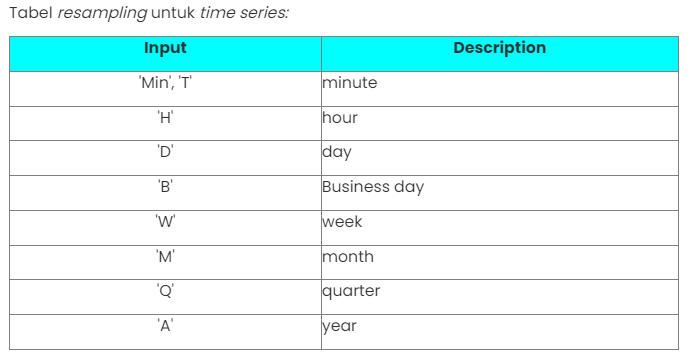

In [110]:
import pandas as pd

# Load dataset
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')

# Konversi kolom timestamp ke tipe data datetime
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])

# Set timestamp sebagai index
gaq = gaq.set_index('timestamp')

# Hapus kolom non-numerik
gaq_numeric = gaq.select_dtypes(include=['number'])

# [1] Downsampling dari daily to weekly dan kita hitung maksimum untuk seminggu
gaq_weekly = gaq_numeric.resample('W').max()
print('Downsampling daily to weekly - max (5 teratas):\n', gaq_weekly.head())

# [2] Downsampling dari daily to quarterly dan kita hitung minimumnya untuk tiap quarter
gaq_quarterly = gaq_numeric.resample('Q').min()
print('Downsampling daily to quarterly - min (5 teratas):\n', gaq_quarterly.head())


Downsampling daily to weekly - max (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-18 00:00:00+00:00    9.7    14.635     121.08                     1.0
2014-05-25 00:00:00+00:00    NaN       NaN        NaN                     NaN
2014-06-01 00:00:00+00:00    NaN       NaN        NaN                     NaN
2014-06-08 00:00:00+00:00    NaN       NaN        NaN                     NaN
2014-06-15 00:00:00+00:00    NaN       NaN        NaN                     NaN
Downsampling daily to quarterly - min (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-06-30 00:00:00+00:00    9.7    14.635    121.080                     1.0
2014-09-30 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-12-31 00:00:00+00:00    NaN       Na

In [109]:
import pandas as pd

# Load dataset
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')

# Konversi kolom timestamp ke tipe data datetime
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])

# Set timestamp sebagai index
gaq = gaq.set_index('timestamp')

# Hapus kolom non-numerik
gaq_numeric = gaq.select_dtypes(include=['number'])

# Upsampling dari daily to hourly dan kita hitung reratanya
gaq_hourly = gaq_numeric.resample('H').mean()

print('Upsampling daily to hourly - mean (5 teratas):\n', gaq_hourly.head())


Upsampling daily to hourly - mean (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-13 03:00:00+00:00    9.7    14.635     121.08                     1.0
2014-05-13 04:00:00+00:00    NaN       NaN        NaN                     NaN
2014-05-13 05:00:00+00:00    NaN       NaN        NaN                     NaN
2014-05-13 06:00:00+00:00    NaN       NaN        NaN                     NaN
2014-05-13 07:00:00+00:00    NaN       NaN        NaN                     NaN


In [112]:
import pandas as pd

# Load dataset
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')

# Konversi kolom timestamp ke tipe data datetime
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])

# Set timestamp sebagai index
gaq = gaq.set_index('timestamp')

# Hapus kolom non-numerik
gaq_numeric = gaq.select_dtypes(include=['number'])

# Resample dari daily to 2 monthly, hitung reratanya, dan fillna = 'bfill'
gaq_2monthly = gaq_numeric.resample('2M').mean().fillna(method='bfill')
print('Resampling daily to 2 monthly - mean - ffill (5 teratas):\n', gaq_2monthly.head())


Resampling daily to 2 monthly - mean - ffill (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-31 00:00:00+00:00    9.7    14.635    121.080                     1.0
2014-07-31 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-09-30 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-11-30 00:00:00+00:00   18.1   -34.560    -58.506                     1.0
2015-01-31 00:00:00+00:00   18.1   -34.560    -58.506                     1.0


C:\Users\immab\AppData\Local\Temp\ipykernel_19072\1812376710.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gaq_2monthly = gaq_numeric.resample('2M').mean().fillna(method='bfill')


Data (5 teratas):
 pollutant                   bc   co  no2   o3  pm10  pm25  so2
timestamp                                                     
2014-05-13 03:00:00+00:00  0.0  0.0  0.0  0.0   0.0   9.7  0.0
2014-08-12 20:00:00+00:00  0.0  0.0  0.0  0.0   0.0   7.1  0.0
2015-04-15 00:00:00+00:00  0.0  0.0  0.0  0.0   0.0  18.1  0.0
2015-08-21 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0  36.9  0.0
2015-09-13 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0   8.8  0.0


C:\Users\immab\AppData\Local\Temp\ipykernel_19072\2744015484.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  line1 = gaq_viz.resample('M').mean().ffill().applymap(lambda x: default_val(x)).apply(lambda x: x/x.max()) # default value if value < 0 then 0, kemudian menghasilkan % value = value/max(value)


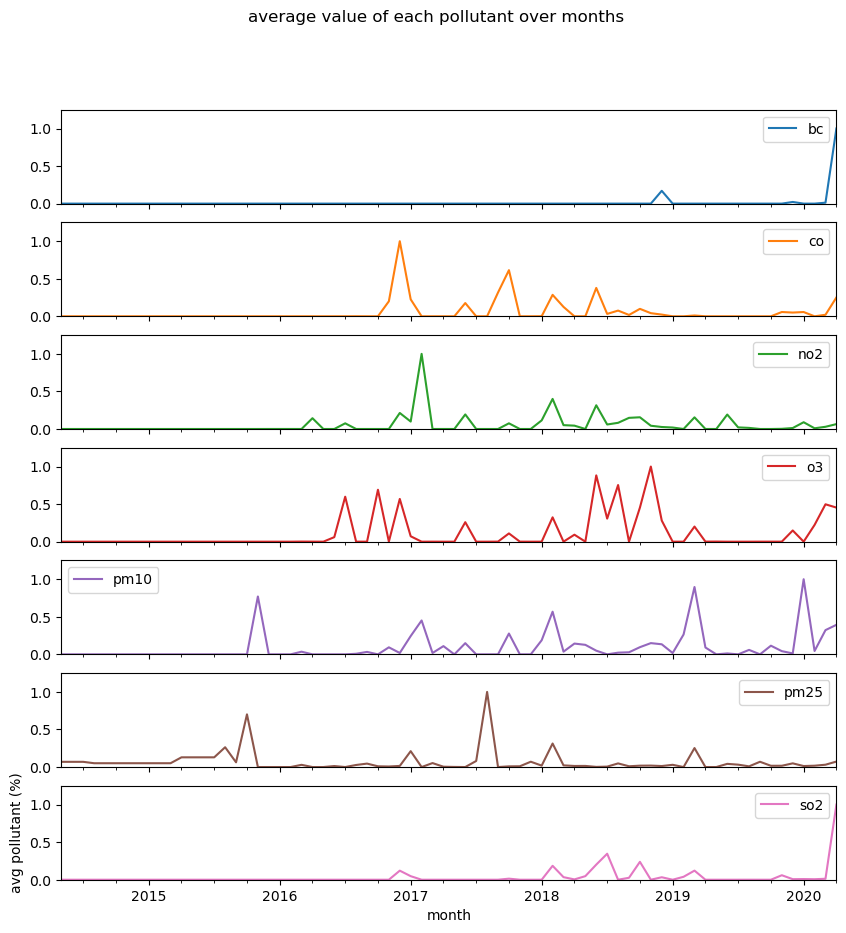

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset 'https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
# [1] Membuat pivot table yang menunjukkan waktu di baris nya dan masing-masing value dari pollutant nya dalam kolom
gaq_viz = gaq[['pollutant','value']].reset_index().set_index(['timestamp','pollutant'])
gaq_viz = gaq_viz.pivot_table(index='timestamp', columns='pollutant', aggfunc='mean').fillna(0)
gaq_viz.columns = gaq_viz.columns.droplevel(0)
print('Data (5 teratas):\n', gaq_viz.head())
# [2] Membuat fungsi yang memberikan default value 0 ketika value nya di bawah 0 dan apply ke setiap elemen dari dataset tersebut, kemudian menampilkannya sebagai chart
def default_val(val):
 if val < 0:
   return 0
 else:
   return val
line1 = gaq_viz.resample('M').mean().ffill().applymap(lambda x: default_val(x)).apply(lambda x: x/x.max()) # default value if value < 0 then 0, kemudian menghasilkan % value = value/max(value)
line1.plot(
   title = 'average value of each pollutant over months',
   figsize = (10,10), #ukuran canvas 10px x 10px
   ylim = (0,1.25), #memberikan batas tampilan y-axis hanya 0 sampai 125%
   subplots = True #memecah plot menjadi beberapa bagian sesuai dengan jumlah kolom
)
plt.ylabel('avg pollutant (%)')
plt.xlabel('month')
plt.show()

**Mini Project**


Pada bagian ini kamu akan mengerjakan sebuah mini project dari Andra terkait perbandingan performa dari setiap cabang di berbagai kota. Tentunya apa yang telah kamu pelajari dalam modul ini berguna dalam menyelesaikan project dari Andra. 

Goal: Automation untuk pembuatan grafik dari measurement yang dibutuhkan.

 

Untuk part 1 ini yang perlu dilakukan:

[1]. Load masing-masing data *.csv dengan Pandas

[2]. Pengecekan dan Transformasi Data 

Cek data sekilas (melihat bentuk data biasanya 5 data teratas)
Cek list kolom untuk semua dataframe apakah seluruh kolom dari keempat dataframe yang terpisah itu sama
Jika sama digabungkan.
Cek informasi dataframe yang telah digabungkan
Statistik deskriptif dari dataframe yang telah digabungkan.

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# [1]. Load masing-masing data dengan pandas
retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

# [2]. Pengecekan Data
print('PENGECEKAN DATA\n\n')
#      Cek data sekilas (tampilkan 5 baris teratas)
print(retail_data1.head())
#      Cek list kolom untuk semua dataframe
print('Kolom retail_data1: %s' %retail_data1.columns)
print('Kolom retail_data2: %s' %retail_data2.columns)
print('Kolom retail_data3: %s' %retail_data3.columns)
print('Kolom retail_data4: %s' %retail_data4.columns)
#      Concat multiple dataframe menjadi 1 dataframe
retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])
print('\nJumlah baris:', retail_table.shape[0])
#      Pengecekan dataframe info
print('\nInfo:')
print(retail_table.info())
#      Pengecekan statistik deskriptif
print('\nStatistik deskriptif:\n', retail_table.describe())

PENGECEKAN DATA


   order_id order_date  customer_id       city     province product_id  \
0   1612885   01-01-19        16293     Malang   Jawa Timur      P1301   
1   1612387   01-01-19        17228      Bogor   Jawa Barat      P2086   
2   1612903   01-01-19        16775  Surakarta  Jawa Tengah      P1656   
3   1612963   01-01-19            0    unknown      unknown      P3127   
4   1612915   01-01-19            0    unknown      unknown      P1230   

     brand  quantity  item_price  total_price  
0  BRAND_F         6      747000      4482000  
1  BRAND_L         4      590000      2360000  
2  BRAND_G         3     1325000      3975000  
3  BRAND_S         1     1045000      1045000  
4  BRAND_E         1     -891000       891000  
Kolom retail_data1: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price', 'total_price'],
      dtype='object')
Kolom retail_data2: Index(['order_id', 'order_date', 'customer_id',

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

# [3]. Transformasi Data
print('TRANSFORMASI DATA\n\n')
# Memastikan data yang memiliki item_price < 0 atau total_price < 0
cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
print('\nitem_price < 0 atau total_price < 0:\n', cek)
# Jika tidak masuk akal datanya dapat dibuang
if cek.shape[0] != 0:
    retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]
# Cek apakah masih ada order_id yang bernilai undefined dan delete row tersebut
cek = retail_table.loc[retail_table['order_id'] == 'undefined']
print('\norder_id yang bernilai undefined:\n', cek)
# Jika ada maka buang baris tersebut
if cek.shape[0] != 0:
    retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

# Transform order_id menjadi int64
retail_table['order_id'] = retail_table['order_id'].astype('int64')
# Transform order_date menjadi datetime Pandas
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])
# Cek dataframe info kembali untuk memastikan
print('\nInfo:')
print(retail_table.info())
# Cek statistik deskriptif kembali, untuk memastikan
print('\nStatistik deskriptif:\n', retail_table.describe())


TRANSFORMASI DATA



item_price < 0 atau total_price < 0:
    order_id order_date  customer_id           city     province product_id  \
4   1612915   01-01-19            0        unknown      unknown      P1230   
96  1612927   01-01-19            0        unknown      unknown      P2736   
21  1697299   01-10-19        17841  Jakarta Utara  DKI Jakarta      P2482   

      brand  quantity  item_price  total_price  
4   BRAND_E         1     -891000       891000  
96  BRAND_P         1     -891000      -891000  
21  BRAND_P         1      520000      -520000  

order_id yang bernilai undefined:
     order_id order_date  customer_id           city     province product_id  \
9  undefined   01-07-19        15150  Jakarta Pusat  DKI Jakarta      P3694   

     brand  quantity  item_price  total_price  
9  BRAND_T        12      159000      1908000  

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 50852 entries, 0 to 20182
Data columns (total 10 columns):
 #   Column       Non-Null Cou

C:\Users\immab\AppData\Local\Temp\ipykernel_19072\975941709.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])


In [116]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
if cek.shape[0] != 0:
    retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

cek = retail_table.loc[retail_table['order_id'] == 'undefined']
if cek.shape[0] != 0:
    retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

# [4]. Filter hanya 5 province terbesar di pulau Jawa
print('\nFILTER 5 PROVINCE TERBESAR DI PULAU JAWA\n')
java = ['DKI Jakarta', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Yogyakarta']
retail_table = retail_table[retail_table['province'].isin(java)]
# Untuk memastikan kolom provinsi isinya sudah sama dengan java
print(retail_table['province'].unique())

# [5]. Kelompokkan sesuai dengan order_date dan province kemudian aggregasikan
groupby_city_province = retail_table.groupby(['order_date', 'province']).agg({
    'order_id': 'nunique',
    'customer_id': 'nunique',
    'product_id': 'nunique',
    'brand': 'nunique',
    'total_price': 'sum'
})
# Ubah nama kolomnya menjadi 'order', 'customer', 'product', 'brand', 'GMV'
groupby_city_province.columns = ['order', 'customer', 'product', 'brand', 'GMV']
print('\ngroupby_city_province (10 data teratas):\n', groupby_city_province.head(10))

# [6]. Unstack untuk mendapatkan order_date di bagian baris dan province di bagian column
unstack_city_province = groupby_city_province.unstack('province').fillna(0)
print('\nunstack_city_province (5 data teratas):\n', unstack_city_province.head(5))



FILTER 5 PROVINCE TERBESAR DI PULAU JAWA

['Jawa Timur' 'Jawa Barat' 'Jawa Tengah' 'Yogyakarta' 'DKI Jakarta']

groupby_city_province (10 data teratas):
                         order  customer  product  brand         GMV
order_date province                                                
2019-01-01 DKI Jakarta     21        20       40     16   357607000
           Jawa Barat       6         6       21      9    94335000
           Jawa Tengah      3         3       19     11    53933000
           Jawa Timur       3         3        9      9    69116000
           Yogyakarta       4         3       10      6  2884114000
2019-01-02 DKI Jakarta     10        10       28     14   149577000
           Jawa Barat       7         7       26     11   172395000
           Jawa Tengah      1         1        2      2    13760000
           Jawa Timur       2         2        3      2    92570000
           Yogyakarta       1         1        6      4   122160000

unstack_city_province (5 dat

C:\Users\immab\AppData\Local\Temp\ipykernel_19072\3603503939.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])


In [117]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

cek = retail_table.loc[retail_table['order_id'] == 'undefined']
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]

groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
groupby_city_province.columns = ['order','customer','product','brand','GMV']

unstack_city_province = groupby_city_province.unstack('province').fillna(0)

# [7]. Slicing data untuk masing-masing measurement, misal: order
idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,idx['order']]
print('\nby order (5 data teratas):\n', by_order.head())

# [8]. Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
by_order_monthly_mean = by_order.resample('M').mean()
print('\nby_order_monthly_mean (5 data teratas):\n', by_order_monthly_mean.head())


by order (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-01         21.0         6.0          3.0         3.0         4.0
2019-01-02         10.0         7.0          1.0         2.0         1.0
2019-01-03          9.0         2.0          8.0         4.0         3.0
2019-01-04         18.0         5.0          5.0         0.0         4.0
2019-01-05         13.0         7.0          2.0         2.0         2.0

by_order_monthly_mean (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-31    14.052632    5.684211     2.631579    2.210526    3.052632
2019-02-28    17.043478    5.956522     2.043478    2.652174    3.130435
2019-03-31    18.259259    5.296296     2.555556    2.777778    2.703704
2019-04-30    18.269231    6.653846     3.153846    2

C:\Users\immab\AppData\Local\Temp\ipykernel_19072\2486860120.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])
C:\Users\immab\AppData\Local\Temp\ipykernel_19072\2486860120.py:25: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  groupby_city_province = retail_table.groupby(['order_date','province']).agg({


C:\Users\immab\AppData\Local\Temp\ipykernel_19072\4045288689.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])
C:\Users\immab\AppData\Local\Temp\ipykernel_19072\4045288689.py:25: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  groupby_city_province = retail_table.groupby(['order_date','province']).agg({


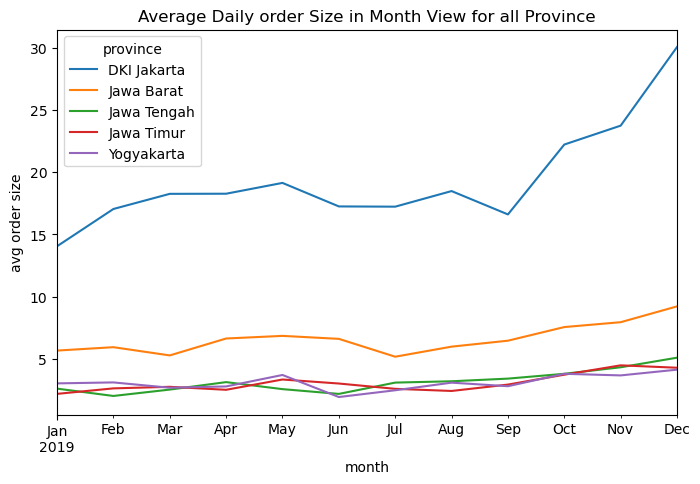

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

cek = retail_table.loc[retail_table['order_id'] == 'undefined']
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]

groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
groupby_city_province.columns = ['order','customer','product','brand','GMV']

unstack_city_province = groupby_city_province.unstack('province').fillna(0)

idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,idx['order']]
by_order_monthly_mean = by_order.resample('M').mean()

# [9]. Plot untuk hasil pada langkah #[8]
by_order_monthly_mean.plot(
    figsize=(8, 5),
    title='Average Daily order Size in Month View for all Province',
)
plt.ylabel('avg order size')
plt.xlabel('month')
plt.show()

C:\Users\immab\AppData\Local\Temp\ipykernel_19072\916515989.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])
C:\Users\immab\AppData\Local\Temp\ipykernel_19072\916515989.py:25: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  groupby_city_province = retail_table.groupby(['order_date','province']).agg({


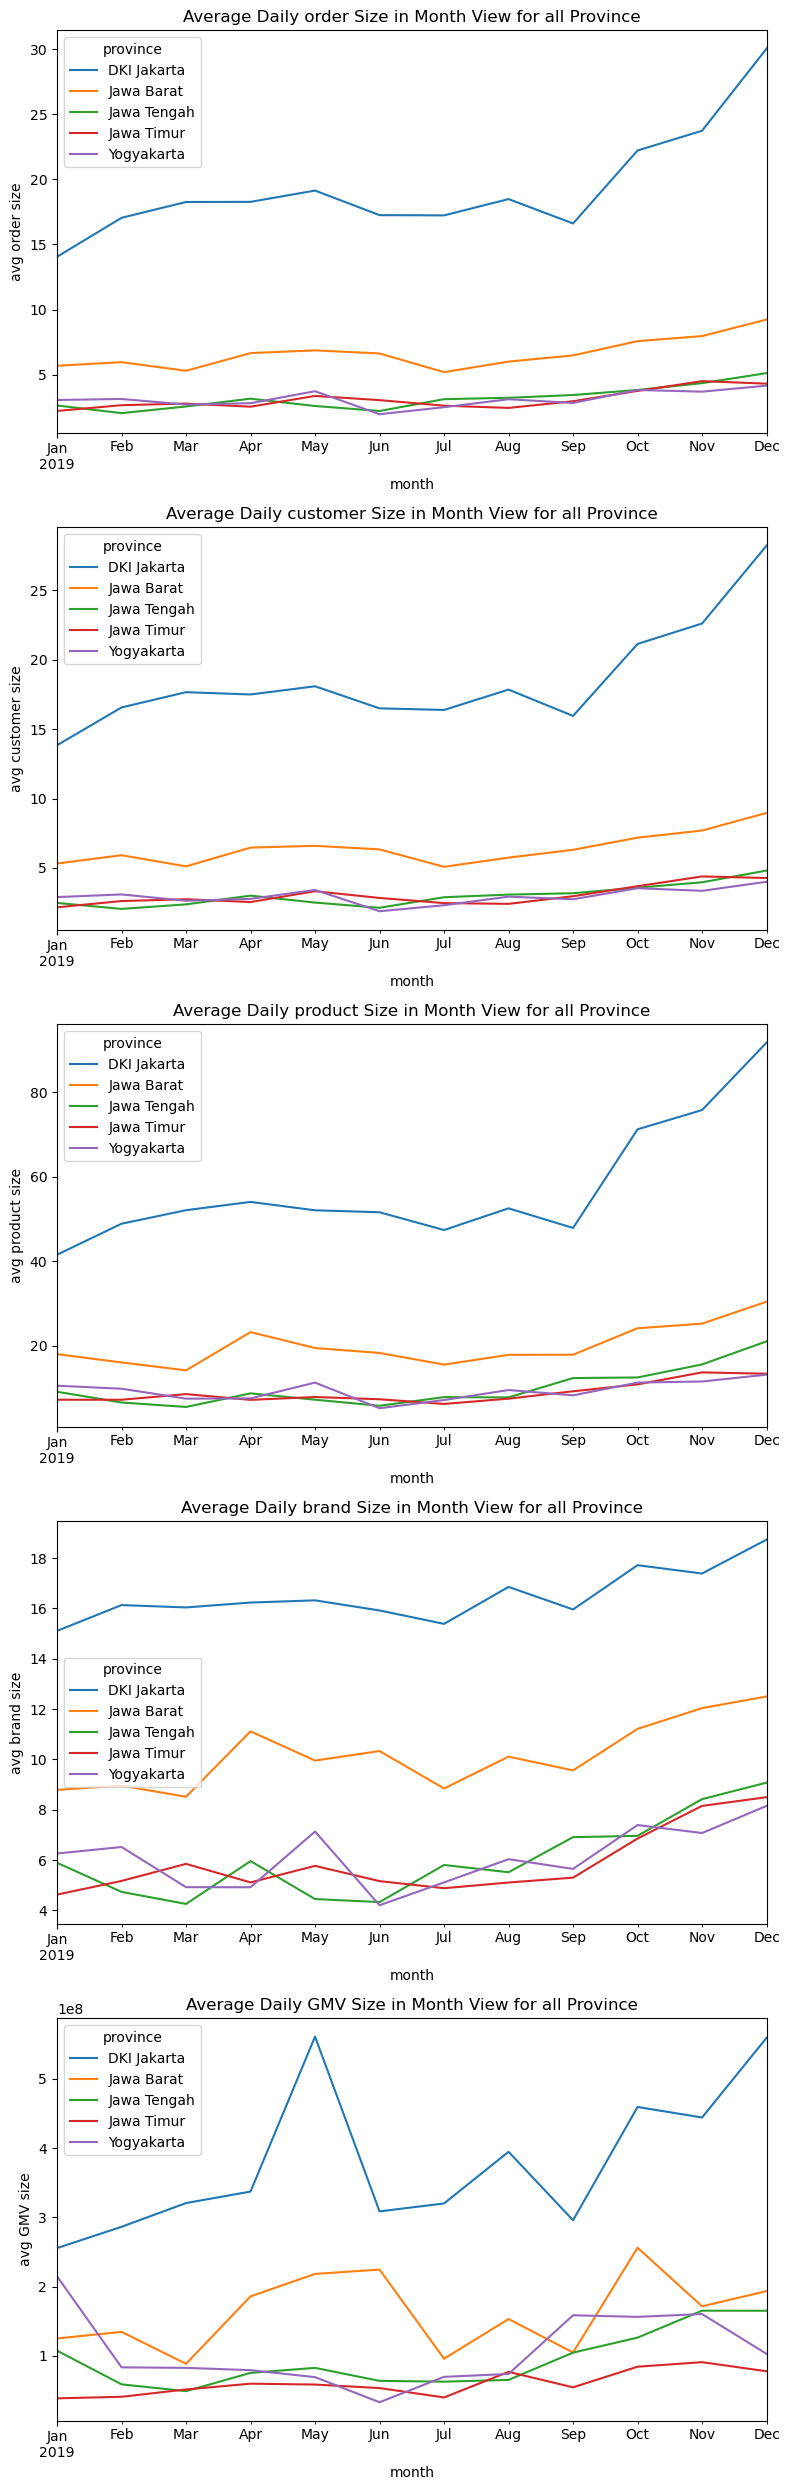

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

cek = retail_table.loc[retail_table['order_id'] == 'undefined']
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]

groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
groupby_city_province.columns = ['order','customer','product','brand','GMV']

unstack_city_province = groupby_city_province.unstack('province').fillna(0)

# Create figure canvas dan axes for 5 line plots
fig, axes = plt.subplots(5, 1, figsize=(8, 25))

# Slicing index
idx = pd.IndexSlice
for i, measurement in enumerate(groupby_city_province.columns):
    # Slicing data untuk masing-masing measurement
    by_measurement = unstack_city_province.loc[:,idx[measurement]]
    # Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
    by_measurement_monthly_mean = by_measurement.resample('M').mean()
    # Plot by_measurement_monthly_mean
    by_measurement_monthly_mean.plot(
        title = 'Average Daily ' + measurement + ' Size in Month View for all Province',
        ax = axes[i]
    )
    axes[i].set_ylabel('avg ' + measurement + ' size')
    axes[i].set_xlabel('month')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

# **DATA QUALITY**


Data Profiling
Pada bagian ini kamu akan mempelajari bagaimana memprofile suatu data secara statistik sehingga data kamu dapat dibersihkan (cleansing) nantinya.

Data Cleansing
Pada bagian ini kamu akan mempelajari bagaimana caranya membersihkan data agar siap digunakan untuk tahap selanjutnya.